## 데이터 처리 환경설정

In [13]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
import datetime as dt
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', None)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### 데이터 불러오기

In [3]:
df_sam2_ori = pd.read_csv('./sample2.csv')

In [4]:
df_sam2 = df_sam2_ori.sort_values(['PID', 'AGE']).copy()

In [5]:
df_sam2.head(3)

,PID,AGE,Eye,Exam Date,Exam ID,Pupil diameter,False positive percent,False negative percent,Fixation loss,Fixation trial,Exam duration(min),GHT,MD,MD probability,PSD,PSD probability,VFI,PDP_01,PDP_02,PDP_03,PDP_04,PDP_05,PDP_06,PDP_07,PDP_08,PDP_09,PDP_10,PDP_11,PDP_12,PDP_13,PDP_14,PDP_15,PDP_16,PDP_17,PDP_18,PDP_19,PDP_20,PDP_21,PDP_22,PDP_23,PDP_24,PDP_25,PDP_26,PDP_27,PDP_28,PDP_29,PDP_30,PDP_31,PDP_32,PDP_33,...,TDV_05,TDV_06,TDV_07,TDV_08,TDV_09,TDV_10,TDV_11,TDV_12,TDV_13,TDV_14,TDV_15,TDV_16,TDV_17,TDV_18,TDV_19,TDV_20,TDV_21,TDV_22,TDV_23,TDV_24,TDV_25,TDV_26,TDV_27,TDV_28,TDV_29,TDV_30,TDV_31,TDV_32,TDV_33,TDV_34,TDV_35,TDV_36,TDV_37,TDV_38,TDV_39,TDV_40,TDV_41,TDV_42,TDV_43,TDV_44,TDV_45,TDV_46,TDV_47,TDV_48,TDV_49,TDV_50,TDV_51,TDV_52,TDV_53,TDV_54
8,1,63,OS,2009-10-17 오전 10:11:32,NaN,3.3,0,7,12,18,6,3,-23.80,5,8.82,5,23,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,4,4,4,4,4,4,NaN,0,4,0,0,0,4,0,...,-30,-29,-31,-31,-30,-30,-30,-25,-31,-33,-33,-30,-31,-26,-24,-31,-33,-22,-30,-34,-31,NaN,-13,-28,-16,-14,-14,-26,-9,-12,NaN,-3,-24,-15,-20,-20,-19,-18,-11,-10,-31,-23,-33,-33,-13,-7,-31,-31,-19,-25
9,2,51,OD,2010-11-19 오전 10:25:16,NaN,6.4,1,3,0,16,5,1,-1.82,1,1.62,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,...,5,1,-3,-2,-4,0,-3,-1,-2,-1,-2,-3,0,-2,0,-2,-2,-3,-3,-3,-3,NaN,-3,-5,-2,-2,-3,-1,-1,-3,NaN,-6,0,-1,-3,-2,-2,-2,-2,-1,0,-2,-2,-3,-1,-1,-1,-2,0,-2
10,2,51,OS,2010-11-19 오전 10:32:01,NaN,6.4,1,0,0,13,4,2,-0.98,0,1.54,0,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,NaN,0,0,3,0,0,0,0,...,-1,1,0,0,2,1,0,-1,0,0,-1,0,-2,0,0,-2,-2,-4,-4,-1,-1,NaN,-1,-1,-6,-2,-1,-1,-2,-3,NaN,1,-2,0,-1,1,-2,-1,1,-1,-1,0,-1,0,-1,0,-3,0,0,0


### 2번 환자를 예시로 작업 전개

In [6]:
pid_2 = df_sam2[(df_sam2['PID']==2) & (df_sam2['Eye']=='OD')].copy()
pid_2['Exam Date'] = pid_2['Exam Date'].apply(lambda x : x[:10])
X = pd.to_datetime(pid_2['Exam Date']).map(dt.datetime.toordinal)
y = pid_2.iloc[:, 17:].dropna(axis = 1)
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), y)

predict_list = np.round(line_fitter.predict([[X.iloc[-1]+365]]), 1)[0]
y.index = pid_2['Exam Date']
pre_df = pd.concat([y, pd.DataFrame(predict_list, index = y.columns, columns = ['next_year']).T])
pre_df

,PDP_01,PDP_02,PDP_03,PDP_04,PDP_05,PDP_06,PDP_07,PDP_08,PDP_09,PDP_10,PDP_11,PDP_12,PDP_13,PDP_14,PDP_15,PDP_16,PDP_17,PDP_18,PDP_19,PDP_20,PDP_21,PDP_22,PDP_23,PDP_24,PDP_25,PDP_27,PDP_28,PDP_29,PDP_30,PDP_31,PDP_32,PDP_33,PDP_34,PDP_36,PDP_37,PDP_38,PDP_39,PDP_40,PDP_41,PDP_42,PDP_43,PDP_44,PDP_45,PDP_46,PDP_47,PDP_48,PDP_49,PDP_50,PDP_51,PDP_52,...,TDV_03,TDV_04,TDV_05,TDV_06,TDV_07,TDV_08,TDV_09,TDV_10,TDV_11,TDV_12,TDV_13,TDV_14,TDV_15,TDV_16,TDV_17,TDV_18,TDV_19,TDV_20,TDV_21,TDV_22,TDV_23,TDV_24,TDV_25,TDV_27,TDV_28,TDV_29,TDV_30,TDV_31,TDV_32,TDV_33,TDV_34,TDV_36,TDV_37,TDV_38,TDV_39,TDV_40,TDV_41,TDV_42,TDV_43,TDV_44,TDV_45,TDV_46,TDV_47,TDV_48,TDV_49,TDV_50,TDV_51,TDV_52,TDV_53,TDV_54
2010-11-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,-2.0,5.0,1.0,-3.0,-2.0,-4.0,0.0,-3.0,-1.0,-2.0,-1.0,-2.0,-3.0,0.0,-2.0,0.0,-2.0,-2.0,-3.0,-3.0,-3.0,-3.0,-3.0,-5.0,-2.0,-2.0,-3.0,-1.0,-1.0,-3.0,-6.0,0.0,-1.0,-3.0,-2.0,-2.0,-2.0,-2.0,-1.0,0.0,-2.0,-2.0,-3.0,-1.0,-1.0,-1.0,-2.0,0.0,-2.0
2011-11-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-3.0,1.0,3.0,-1.0,2.0,-1.0,-2.0,-2.0,-3.0,-2.0,-1.0,-4.0,-2.0,-2.0,-2.0,1.0,0.0,0.0,4.0,2.0,1.0,-1.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,0.0,1.0,2.0,0.0
2012-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-2.0,1.0,-1.0,-3.0,-1.0,-3.0,1.0,0.0,-1.0,0.0,-2.0,-3.0,0.0,0.0,-1.0,2.0,-1.0,-4.0,-1.0,0.0,0.0,3.0,-1.0,-1.0,-1.0,-2.0,0.0,-1.0,-2.0,-1.0,-1.0,2.0,-1.0,-1.0,-2.0,-2.0,-1.0,-2.0,-1.0,1.0,0.0,-1.0,0.0,1.0,0.0,-2.0,0.0,-1.0,0.0
2013-10-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,-1.0,1.0,-1.0,0.0,2.0,0.0,2.0,0.0,-1.0,-1.0,-1.0,0.0,2.0,-2.0,3.0,-1.0,-2.0,-3.0,-1.0,-3.0,-1.0,-1.0,1.0,-1.0,0.0,-2.0,-2.0,-1.0,-2.0,1.0,-1.0,0.0,-1.0,-2.0,-3.0,-2.0,1.0,0.0,8.0,0.0,-4.0,-2.0,-2.0,2.0,1.0,0.0,0.0,2.0
2014-09-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3.0,1.0,3.0,2.0,2.0,0.0,-1.0,4.0,0.0,0.0,-1.0,1.0,1.0,3.0,1.0,1.0,2.0,5.0,0.0,4.0,1.0,0.0,0.0,1.0,-2.0,0.0,1.0,-4.0,1.0,-1.0,1.0,0.0,0.0,0.0,3.0,3.0,-1.0,7.0,1.0,-1.0,0.0,1.0,2.0,1.0,-1.0,0.0,0.0,-1.0,2.0,0.0
2015-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,-2.0,2.0,-1.0,1.0,0.0,0.0,-1.0,2.0,1.0,1.0,-1.0,6.0,0.0,2.0,0.0,0.0,-1.0,-3.0,-1.0,-4.0,-3.0,-3.0,-2.0,-1.0,-1.0,-4.0,-1.0,0.0,0.0,3.0,-1.0,2.0,0.0,0.0,0.0,-1.0,0.0,1.0,-1.0,8.0,-3.0,0.0,-2.0,4.0
2017-10-24,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,-7.0,1.0,0.0,-3.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,-1.0,-4.0,1.0,2.0,0.0,1.0,-1.0,-1.0,-3.0,-1.0,-1.0,-4.0,0.0,1.0,-1.0,-2.0,-2.0,-1.0,0.0,2.0,1.0,0.0,-1.0,-2.0,-1.0,-2.0,-4.0,-5.0,0.0,-3.0,1.0,2.0,-1.0,3.0,-2.0,1.0,-1.0
next_year,0.0,0.0,0.0,0.0,2.1,0.0,0.0,0.0,0.7,0.0,0.0,0.0,0.5,0.0,-0.0,0.0,1.4,-0.2,0.0,0.0,0.1,0.4,0.0,1.1,0.0,0.2,0.1,1.6,0.2,1.7,0.2,-0.2,0.0,0.3,0.0,0.0,0.0,0.1,0.5,0.1,0.0,1.0,2.3,0.4,1.8,0.1,0.3,0.0,1.2,0.3,..

## 환자 개인의 녹내장 예측 함수

In [61]:
def predict_person_OD(pid, eye, part):
    
    pid_person = df_sam2[(df_sam2['PID']==pid) & (df_sam2['Eye']==eye)]
    pid_person['Exam Date'] = pid_person['Exam Date'].apply(lambda x : x[:10])
    
    X = pd.to_datetime(pid_person['Exam Date']).map(dt.datetime.toordinal)
    y = pid_person.iloc[:, 17:].dropna(axis = 1)
    
    line_fitter = LinearRegression()
    line_fitter.fit(X.values.reshape(-1,1), y)
    
    predict_list = np.round(line_fitter.predict([[X.iloc[-1]+365]]), 1)[0]
    
    y.index = pid_person['Exam Date']
    person_df = pd.concat([y, pd.DataFrame(predict_list, index = y.columns, columns = ['next_year']).T])
     
    linear_check_list = ['PDP', 'PDV', 'TDP', 'TDV', 'THV'] 
    if pid_2['Eye'].iloc[1]=='OD':
        for j in range(len(linear_check_list)):
            if linear_check_list[j]==part:
                use_ind = j

        img = np.zeros((400, 400, 3), np.uint8)
        if use_ind<=3:
            for i in range(52):
                if i<4:
                    n=0
                    point1 = 120 + 40 * i, 40*n
                    point2 = 160 + 40 * i, 40*(n+1)
                    point3 = 127 + 40 * i, 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

                elif 4<=i<10:
                    n=1
                    point1 = 80 + 40 * (i-4), 40*n
                    point2 = 120 + 40 * (i-4), 40*(n+1)
                    point3 = 87 + 40 * (i-4), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)       

                elif 10<=i<18:
                    n=2
                    point1 = 40 + 40 * (i-10), 40*n
                    point2 = 80 + 40 * (i-10), 40*(n+1)
                    point3 = 47 + 40 * (i-10), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

                elif 18<=i<26:
                    n=3
                    if 18<=i<25:
                        point1 = 0 + 40 * (i-18), 40*n
                        point2 = 40 + 40 * (i-18), 40*(n+1)
                        point3 = 7 + 40 * (i-18), 40*n+22
                        img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                        if use_ind<=1:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)
                        elif use_ind>=2:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)

                    elif i==25:    
                        point1 = 40 + 40 * (i-18), 40*n
                        point2 = 80 + 40 * (i-18), 40*(n+1)
                        point3 = 47 + 40 * (i-18), 40*n+22
                        img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                        if use_ind<=1:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)
                        elif use_ind>=2:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)

                elif 26<=i<34:
                    n=4
                    if 26<=i<33:
                        point1 = 0 + 40 * (i-26), 40*n
                        point2 = 40 + 40 * (i-26), 40*(n+1)
                        point3 = 7 + 40 * (i-26), 40*n+22
                        img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                        if use_ind<=1:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)
                        elif use_ind>=2:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)

                    elif i==33:    
                        point1 = 40 + 40 * (i-26), 40*n
                        point2 = 80 + 40 * (i-26), 40*(n+1)
                        point3 = 47 + 40 * (i-26), 40*n+22
                        img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                        if use_ind<=1:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)
                        elif use_ind>=2:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)

                elif 34<=i<42:
                    n=5
                    point1 = 40 + 40 * (i-34), 40*n
                    point2 = 80 + 40 * (i-34), 40*(n+1)
                    point3 = 47 + 40 * (i-34), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

                elif 42<=i<48:
                    n=6
                    point1 = 80 + 40 * (i-42), 40*n
                    point2 = 120 + 40 * (i-42), 40*(n+1)
                    point3 = 87 + 40 * (i-42), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

                elif 48<=i:
                    n=7
                    point1 = 120 + 40 * (i-48), 40*n
                    point2 = 160 + 40 * (i-48), 40*(n+1)
                    point3 = 127 + 40 * (i-48), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)   

        elif use_ind<=4:
            use_ind = 2
            for i in range(54):
                if i<4:
                    n=0
                    point1 = 120 + 40 * i, 40*n
                    point2 = 160 + 40 * i, 40*(n+1)
                    point3 = 127 + 40 * i, 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

                elif 4<=i<10:
                    n=1
                    point1 = 80 + 40 * (i-4), 40*n
                    point2 = 120 + 40 * (i-4), 40*(n+1)
                    point3 = 87 + 40 * (i-4), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)    

                elif 10<=i<18:
                    n=2
                    point1 = 40 + 40 * (i-10), 40*n
                    point2 = 80 + 40 * (i-10), 40*(n+1)
                    point3 = 47 + 40 * (i-10), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

                elif 18<=i<27:
                    n=3
                    point1 = 0 + 40 * (i-18), 40*n
                    point2 = 40 + 40 * (i-18), 40*(n+1)
                    point3 = 7 + 40 * (i-18), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)


                elif 27<=i<36:
                    n=4
                    point1 = 0 + 40 * (i-27), 40*n
                    point2 = 40 + 40 * (i-27), 40*(n+1)
                    point3 = 7 + 40 * (i-27), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)

                elif 36<=i<44:
                    n=5
                    point1 = 40 + 40 * (i-36), 40*n
                    point2 = 80 + 40 * (i-36), 40*(n+1)
                    point3 = 47 + 40 * (i-36), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)

                elif 44<=i<50:
                    n=6
                    point1 = 80 + 40 * (i-44), 40*n
                    point2 = 120 + 40 * (i-44), 40*(n+1)
                    point3 = 87 + 40 * (i-44), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)

                elif 50<=i:
                    n=7
                    point1 = 120 + 40 * (i-50), 40*n
                    point2 = 160 + 40 * (i-50), 40*(n+1)
                    point3 = 127 + 40 * (i-50), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)


    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)            
    plt.imshow(imgRGB)
    plt.show()
        
    cv2.imshow(part, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return person_df

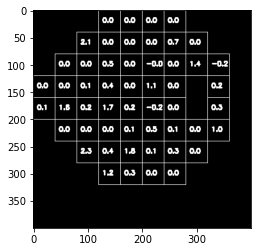

,PDP_01,PDP_02,PDP_03,PDP_04,PDP_05,PDP_06,PDP_07,PDP_08,PDP_09,PDP_10,PDP_11,PDP_12,PDP_13,PDP_14,PDP_15,PDP_16,PDP_17,PDP_18,PDP_19,PDP_20,PDP_21,PDP_22,PDP_23,PDP_24,PDP_25,PDP_27,PDP_28,PDP_29,PDP_30,PDP_31,PDP_32,PDP_33,PDP_34,PDP_36,PDP_37,PDP_38,PDP_39,PDP_40,PDP_41,PDP_42,PDP_43,PDP_44,PDP_45,PDP_46,PDP_47,PDP_48,PDP_49,PDP_50,PDP_51,PDP_52,...,TDV_03,TDV_04,TDV_05,TDV_06,TDV_07,TDV_08,TDV_09,TDV_10,TDV_11,TDV_12,TDV_13,TDV_14,TDV_15,TDV_16,TDV_17,TDV_18,TDV_19,TDV_20,TDV_21,TDV_22,TDV_23,TDV_24,TDV_25,TDV_27,TDV_28,TDV_29,TDV_30,TDV_31,TDV_32,TDV_33,TDV_34,TDV_36,TDV_37,TDV_38,TDV_39,TDV_40,TDV_41,TDV_42,TDV_43,TDV_44,TDV_45,TDV_46,TDV_47,TDV_48,TDV_49,TDV_50,TDV_51,TDV_52,TDV_53,TDV_54
2010-11-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,-2.0,5.0,1.0,-3.0,-2.0,-4.0,0.0,-3.0,-1.0,-2.0,-1.0,-2.0,-3.0,0.0,-2.0,0.0,-2.0,-2.0,-3.0,-3.0,-3.0,-3.0,-3.0,-5.0,-2.0,-2.0,-3.0,-1.0,-1.0,-3.0,-6.0,0.0,-1.0,-3.0,-2.0,-2.0,-2.0,-2.0,-1.0,0.0,-2.0,-2.0,-3.0,-1.0,-1.0,-1.0,-2.0,0.0,-2.0
2011-11-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-3.0,1.0,3.0,-1.0,2.0,-1.0,-2.0,-2.0,-3.0,-2.0,-1.0,-4.0,-2.0,-2.0,-2.0,1.0,0.0,0.0,4.0,2.0,1.0,-1.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,0.0,1.0,2.0,0.0
2012-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-2.0,1.0,-1.0,-3.0,-1.0,-3.0,1.0,0.0,-1.0,0.0,-2.0,-3.0,0.0,0.0,-1.0,2.0,-1.0,-4.0,-1.0,0.0,0.0,3.0,-1.0,-1.0,-1.0,-2.0,0.0,-1.0,-2.0,-1.0,-1.0,2.0,-1.0,-1.0,-2.0,-2.0,-1.0,-2.0,-1.0,1.0,0.0,-1.0,0.0,1.0,0.0,-2.0,0.0,-1.0,0.0
2013-10-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,-1.0,1.0,-1.0,0.0,2.0,0.0,2.0,0.0,-1.0,-1.0,-1.0,0.0,2.0,-2.0,3.0,-1.0,-2.0,-3.0,-1.0,-3.0,-1.0,-1.0,1.0,-1.0,0.0,-2.0,-2.0,-1.0,-2.0,1.0,-1.0,0.0,-1.0,-2.0,-3.0,-2.0,1.0,0.0,8.0,0.0,-4.0,-2.0,-2.0,2.0,1.0,0.0,0.0,2.0
2014-09-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3.0,1.0,3.0,2.0,2.0,0.0,-1.0,4.0,0.0,0.0,-1.0,1.0,1.0,3.0,1.0,1.0,2.0,5.0,0.0,4.0,1.0,0.0,0.0,1.0,-2.0,0.0,1.0,-4.0,1.0,-1.0,1.0,0.0,0.0,0.0,3.0,3.0,-1.0,7.0,1.0,-1.0,0.0,1.0,2.0,1.0,-1.0,0.0,0.0,-1.0,2.0,0.0
2015-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,-2.0,2.0,-1.0,1.0,0.0,0.0,-1.0,2.0,1.0,1.0,-1.0,6.0,0.0,2.0,0.0,0.0,-1.0,-3.0,-1.0,-4.0,-3.0,-3.0,-2.0,-1.0,-1.0,-4.0,-1.0,0.0,0.0,3.0,-1.0,2.0,0.0,0.0,0.0,-1.0,0.0,1.0,-1.0,8.0,-3.0,0.0,-2.0,4.0
2017-10-24,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,-7.0,1.0,0.0,-3.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,-1.0,-4.0,1.0,2.0,0.0,1.0,-1.0,-1.0,-3.0,-1.0,-1.0,-4.0,0.0,1.0,-1.0,-2.0,-2.0,-1.0,0.0,2.0,1.0,0.0,-1.0,-2.0,-1.0,-2.0,-4.0,-5.0,0.0,-3.0,1.0,2.0,-1.0,3.0,-2.0,1.0,-1.0
next_year,0.0,0.0,0.0,0.0,2.1,0.0,0.0,0.0,0.7,0.0,0.0,0.0,0.5,0.0,-0.0,0.0,1.4,-0.2,0.0,0.0,0.1,0.4,0.0,1.1,0.0,0.2,0.1,1.6,0.2,1.7,0.2,-0.2,0.0,0.3,0.0,0.0,0.0,0.1,0.5,0.1,0.0,1.0,2.3,0.4,1.8,0.1,0.3,0.0,1.2,0.3,..

In [63]:
predict_person_OD(2, 'OD','PDP')

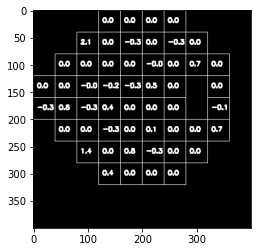

In [38]:
linear_check_list = ['PDP', 'PDV', 'TDP', 'TDV', 'THV'] 
if pid_2['Eye'].iloc[1]=='OD':
    for j in range(len(linear_check_list)):
        if linear_check_list[j]=='TDP':
            use_ind = j

    img = np.zeros((400, 400, 3), np.uint8)
    if use_ind<=3:
        for i in range(52):
            if i<4:
                n=0
                point1 = 120 + 40 * i, 40*n
                point2 = 160 + 40 * i, 40*(n+1)
                point3 = 127 + 40 * i, 40*n+22
                img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                if use_ind<=1:
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)
                elif use_ind>=2:
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)

            elif 4<=i<10:
                n=1
                point1 = 80 + 40 * (i-4), 40*n
                point2 = 120 + 40 * (i-4), 40*(n+1)
                point3 = 87 + 40 * (i-4), 40*n+22
                img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                if use_ind<=1:
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)
                elif use_ind>=2:
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)       

            elif 10<=i<18:
                n=2
                point1 = 40 + 40 * (i-10), 40*n
                point2 = 80 + 40 * (i-10), 40*(n+1)
                point3 = 47 + 40 * (i-10), 40*n+22
                img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                if use_ind<=1:
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)
                elif use_ind>=2:
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)

            elif 18<=i<26:
                n=3
                if 18<=i<25:
                    point1 = 0 + 40 * (i-18), 40*n
                    point2 = 40 + 40 * (i-18), 40*(n+1)
                    point3 = 7 + 40 * (i-18), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

                elif i==25:    
                    point1 = 40 + 40 * (i-18), 40*n
                    point2 = 80 + 40 * (i-18), 40*(n+1)
                    point3 = 47 + 40 * (i-18), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

            elif 26<=i<34:
                n=4
                if 26<=i<33:
                    point1 = 0 + 40 * (i-26), 40*n
                    point2 = 40 + 40 * (i-26), 40*(n+1)
                    point3 = 7 + 40 * (i-26), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

                elif i==33:    
                    point1 = 40 + 40 * (i-26), 40*n
                    point2 = 80 + 40 * (i-26), 40*(n+1)
                    point3 = 47 + 40 * (i-26), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

            elif 34<=i<42:
                n=5
                point1 = 40 + 40 * (i-34), 40*n
                point2 = 80 + 40 * (i-34), 40*(n+1)
                point3 = 47 + 40 * (i-34), 40*n+22
                img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                if use_ind<=1:
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)
                elif use_ind>=2:
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)

            elif 42<=i<48:
                n=6
                point1 = 80 + 40 * (i-42), 40*n
                point2 = 120 + 40 * (i-42), 40*(n+1)
                point3 = 87 + 40 * (i-42), 40*n+22
                img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                if use_ind<=1:
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)
                elif use_ind>=2:
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)

            elif 48<=i:
                n=7
                point1 = 120 + 40 * (i-48), 40*n
                point2 = 160 + 40 * (i-48), 40*(n+1)
                point3 = 127 + 40 * (i-48), 40*n+22
                img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                if use_ind<=1:
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)
                elif use_ind>=2:
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)   

    elif use_ind<=4:
        use_ind = 2
        for i in range(54):
            if i<4:
                n=0
                point1 = 120 + 40 * i, 40*n
                point2 = 160 + 40 * i, 40*(n+1)
                point3 = 127 + 40 * i, 40*n+22
                img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)

            elif 4<=i<10:
                n=1
                point1 = 80 + 40 * (i-4), 40*n
                point2 = 120 + 40 * (i-4), 40*(n+1)
                point3 = 87 + 40 * (i-4), 40*n+22
                img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)    

            elif 10<=i<18:
                n=2
                point1 = 40 + 40 * (i-10), 40*n
                point2 = 80 + 40 * (i-10), 40*(n+1)
                point3 = 47 + 40 * (i-10), 40*n+22
                img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)

            elif 18<=i<27:
                n=3
                point1 = 0 + 40 * (i-18), 40*n
                point2 = 40 + 40 * (i-18), 40*(n+1)
                point3 = 7 + 40 * (i-18), 40*n+22
                img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)


            elif 27<=i<36:
                n=4
                point1 = 0 + 40 * (i-26), 40*n
                point2 = 40 + 40 * (i-26), 40*(n+1)
                point3 = 7 + 40 * (i-26), 40*n+22
                img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                 thickness = 2)

            elif 36<=i<44:
                n=5
                point1 = 40 + 40 * (i-34), 40*n
                point2 = 80 + 40 * (i-34), 40*(n+1)
                point3 = 47 + 40 * (i-34), 40*n+22
                img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                 thickness = 2)

            elif 44<=i<50:
                n=6
                point1 = 80 + 40 * (i-42), 40*n
                point2 = 120 + 40 * (i-42), 40*(n+1)
                point3 = 87 + 40 * (i-42), 40*n+22
                img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                 thickness = 2)

            elif 50<=i:
                n=7
                point1 = 120 + 40 * (i-48), 40*n
                point2 = 160 + 40 * (i-48), 40*(n+1)
                point3 = 127 + 40 * (i-48), 40*n+22
                img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                 thickness = 2)
                    
                    
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)            
    plt.imshow(imgRGB)
    plt.show()

    cv2.imshow(linear_check_list[use_ind], img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# elif pid_2['Eye']=='OS':
#     for j in range(len(linear_check_list)):
#         if linear_check_list[j]=='TDP':
#             use_ind = j

#     img = np.zeros((400, 400, 3), np.uint8)

#     for i in range(52):
#         if i<4:
#             n=0
#             point1 = 240 - 40 * i, 40*n
#             point2 = 280 - 40 * i, 40*(n+1)
#             point3 = 247 - 40 * i, 40*n+22
#             img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
#             if use_ind<=1:
#                 img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
#                                  thickness = 2)
#             elif use_ind>=2:
#                 img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
#                                  thickness = 2)

#         elif 4<=i<10:
#             n=1
#             point1 = 280 - 40 * (i-4), 40*n
#             point2 = 320 - 40 * (i-4), 40*(n+1)
#             point3 = 287 - 40 * (i-4), 40*n+22
#             img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
#             if use_ind<=1:
#                 img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
#                                  thickness = 2)
#             elif use_ind>=2:
#                 img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
#                                  thickness = 2)       

#         elif 10<=i<18:
#             n=2
#             point1 = 320 - 40 * (i-10), 40*n
#             point2 = 360 - 40 * (i-10), 40*(n+1)
#             point3 = 327 - 40 * (i-10), 40*n+22
#             img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
#             if use_ind<=1:
#                 img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
#                                  thickness = 2)
#             elif use_ind>=2:
#                 img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
#                                  thickness = 2)

#         elif 18<=i<26:
#             n=3
#             if 18<=i<25:
#                 point1 = 320 - 40 * (i-18), 40*n
#                 point2 = 360 - 40 * (i-18), 40*(n+1)
#                 point3 = 327 - 40 * (i-18), 40*n+22
#                 img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
#                 if use_ind<=1:
#                     img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
#                                      thickness = 2)
#                 elif use_ind>=2:
#                     img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
#                                      thickness = 2)

#             elif i==25:    
#                 point1 = 40 + 40 * (i-18), 40*n
#                 point2 = 80 + 40 * (i-18), 40*(n+1)
#                 point3 = 47 + 40 * (i-18), 40*n+22
#                 img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
#                 if use_ind<=1:
#                     img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
#                                      thickness = 2)
#                 elif use_ind>=2:
#                     img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
#                                      thickness = 2)

#         elif 26<=i<34:
#             n=4
#             if 26<=i<33:
#                 point1 = 0 + 40 * (i-26), 40*n
#                 point2 = 40 + 40 * (i-26), 40*(n+1)
#                 point3 = 7 + 40 * (i-26), 40*n+22
#                 img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
#                 if use_ind<=1:
#                     img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
#                                      thickness = 2)
#                 elif use_ind>=2:
#                     img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
#                                      thickness = 2)

#             elif i==33:    
#                 point1 = 40 + 40 * (i-26), 40*n
#                 point2 = 80 + 40 * (i-26), 40*(n+1)
#                 point3 = 47 + 40 * (i-26), 40*n+22
#                 img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
#                 if use_ind<=1:
#                     img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
#                                      thickness = 2)
#                 elif use_ind>=2:
#                     img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
#                                      thickness = 2)

#         elif 34<=i<42:
#             n=5
#             point1 = 40 + 40 * (i-34), 40*n
#             point2 = 80 + 40 * (i-34), 40*(n+1)
#             point3 = 47 + 40 * (i-34), 40*n+22
#             img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
#             if use_ind<=1:
#                 img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
#                                  thickness = 2)
#             elif use_ind>=2:
#                 img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
#                                  thickness = 2)

#         elif 42<=i<48:
#             n=6
#             point1 = 80 + 40 * (i-42), 40*n
#             point2 = 120 + 40 * (i-42), 40*(n+1)
#             point3 = 87 + 40 * (i-42), 40*n+22
#             img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
#             if use_ind<=1:
#                 img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
#                                  thickness = 2)
#             elif use_ind>=2:
#                 img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
#                                  thickness = 2)

#         elif 48<=i:
#             n=7
#             point1 = 120 + 40 * (i-48), 40*n
#             point2 = 160 + 40 * (i-48), 40*(n+1)
#             point3 = 127 + 40 * (i-48), 40*n+22
#             img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
#             if use_ind<=1:
#                 img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
#                                  thickness = 2)
#             elif use_ind>=2:
#                 img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
#                                  thickness = 2)   

#     imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)            
#     plt.imshow(imgRGB)
#     plt.show()

#     cv2.imshow(linear_check_list[use_ind], img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()    


In [28]:
pid_2['Eye']=='OD'

9     True
11    True
13    True
14    True
19    True
21    True
18    True
Name: Eye, dtype: bool

In [27]:
pid_2['Eye']

9     OD
11    OD
13    OD
14    OD
19    OD
21    OD
18    OD
Name: Eye, dtype: object